In [2]:
!pip install swifter
!pip install tmdbv3api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 kB 13.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16322 sha256=a7050bd711dd63d701bd2428ba8bc7eadee71fa691f1046fb68a130fb5618a40
  Stored in directory: /root/.cache/pip/wheels/6c/bd/3e/2d6afc9bc36c9975f8e4215a270bbac6580c4361ebd6bb2323
Successfully built swifter


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt
import seaborn as sns
import swifter
import ast
from tmdbv3api import TMDb
from tmdbv3api import Movie
import json
import requests

/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links.csv
/kaggle/input/genres/recentgenres.csv


In [4]:
movies_df = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv', low_memory = False)
credits_df = pd.read_csv('/kaggle/input/the-movies-dataset/credits.csv')
movies_df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [5]:
credits_df

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [6]:
movies_df['id'] = credits_df['id']

In [7]:
# movies_df['id'] = movies_df['id'].astype('int64')
movies_df = credits_df.merge(movies_df, on = 'id')
movies_df

,cast,crew,id,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,tt0114709,en,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,tt0113497,en,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,tt0113228,en,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0114885,en,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0113041,en,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45551,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '52fe4a71c3a36847f81ce35b', 'de...",106807,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,tt6209470,fa,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45552,[],"[{'credit_id': '539ef1090e0a263dd00000d7', 'de...",276895,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt2028550,tl,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45553,"[{'cast_id': 1, 'character': 'Devki Sabarwal',...","[{'credit_id': '58ee55bbc3a3683df500bd0f', 'de...",404604,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,tt0303758,en,...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45554,"[{'cast_id': 0, 'character': 'Lauren', 'credit...","[{'credit_id': '587626f4c3a3682b33008299', 'de...",420346,False,NaN,0,[],NaN,tt0008536,en,...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [8]:
movies_df.columns

Index(['cast', 'crew', 'id', 'adult', 'belongs_to_collection', 'budget',
       'genres', 'homepage', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [9]:
movies_df['original_language'].value_counts()

en       32326
fr        2448
it        1529
ja        1353
de        1083
         ...  
zu           1
qu           1
104.0        1
la           1
si           1
Name: original_language, Length: 92, dtype: int64

In [10]:
#removing other language movies
movies_df = movies_df[movies_df['original_language'] == 'en']
movies_df

,cast,crew,id,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,tt0114709,en,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,tt0113497,en,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,tt0113228,en,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0114885,en,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0113041,en,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45549,"[{'cast_id': 1, 'character': 'Roo (voice)', 'c...","[{'credit_id': '52fe46249251416c7506e969', 'de...",14885,False,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,tt0112613,en,...,1995-01-01,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Caged Heat 3000,False,3.5,1.0
45550,"[{'cast_id': 3, 'character': 'All the members ...","[{'credit_id': '52fe478dc3a36847f813bd6b', 'de...",49280,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,tt0102797,en,...,1991-05-13,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Robin Hood,False,5.7,26.0
45553,"[{'cast_id': 1, 'character': 'Devki Sabarwal',...","[{'credit_id': '58ee55bbc3a3683df500bd0f', 'de...",404604,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,tt0303758,en,...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45554,"[{'cast_id': 0, 'character': 'Lauren', 'credit...","[{'credit_id': '587626f4c3a3682b33008299', 'de...",420346,False,NaN,0,[],NaN,tt0008536,en,...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [11]:
def year(date):
    if pd.notnull(date):
        return date[:4]

movies_df['year'] = movies_df['release_date'].swifter.apply(year)
movies_df

Pandas Apply:   0%|          | 0/32326 [00:00<?, ?it/s]

/tmp/ipykernel_115/509555266.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['year'] = movies_df['release_date'].swifter.apply(year)


,cast,crew,id,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,tt0114709,en,...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,tt0113497,en,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,tt0113228,en,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0114885,en,...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0113041,en,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45549,"[{'cast_id': 1, 'character': 'Roo (voice)', 'c...","[{'credit_id': '52fe46249251416c7506e969', 'de...",14885,False,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,tt0112613,en,...,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Caged Heat 3000,False,3.5,1.0,1995
45550,"[{'cast_id': 3, 'character': 'All the members ...","[{'credit_id': '52fe478dc3a36847f813bd6b', 'de...",49280,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,tt0102797,en,...,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Robin Hood,False,5.7,26.0,1991
45553,"[{'cast_id': 1, 'character': 'Devki Sabarwal',...","[{'credit_id': '58ee55bbc3a3683df500bd0f', 'de...",404604,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,tt0303758,en,...,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,2003
45554,"[{'cast_id': 0, 'character': 'Lauren', 'credit...","[{'credit_id': '587626f4c3a3682b33008299', 'de...",420346,False,NaN,0,[],NaN,tt0008536,en,...,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0,1917


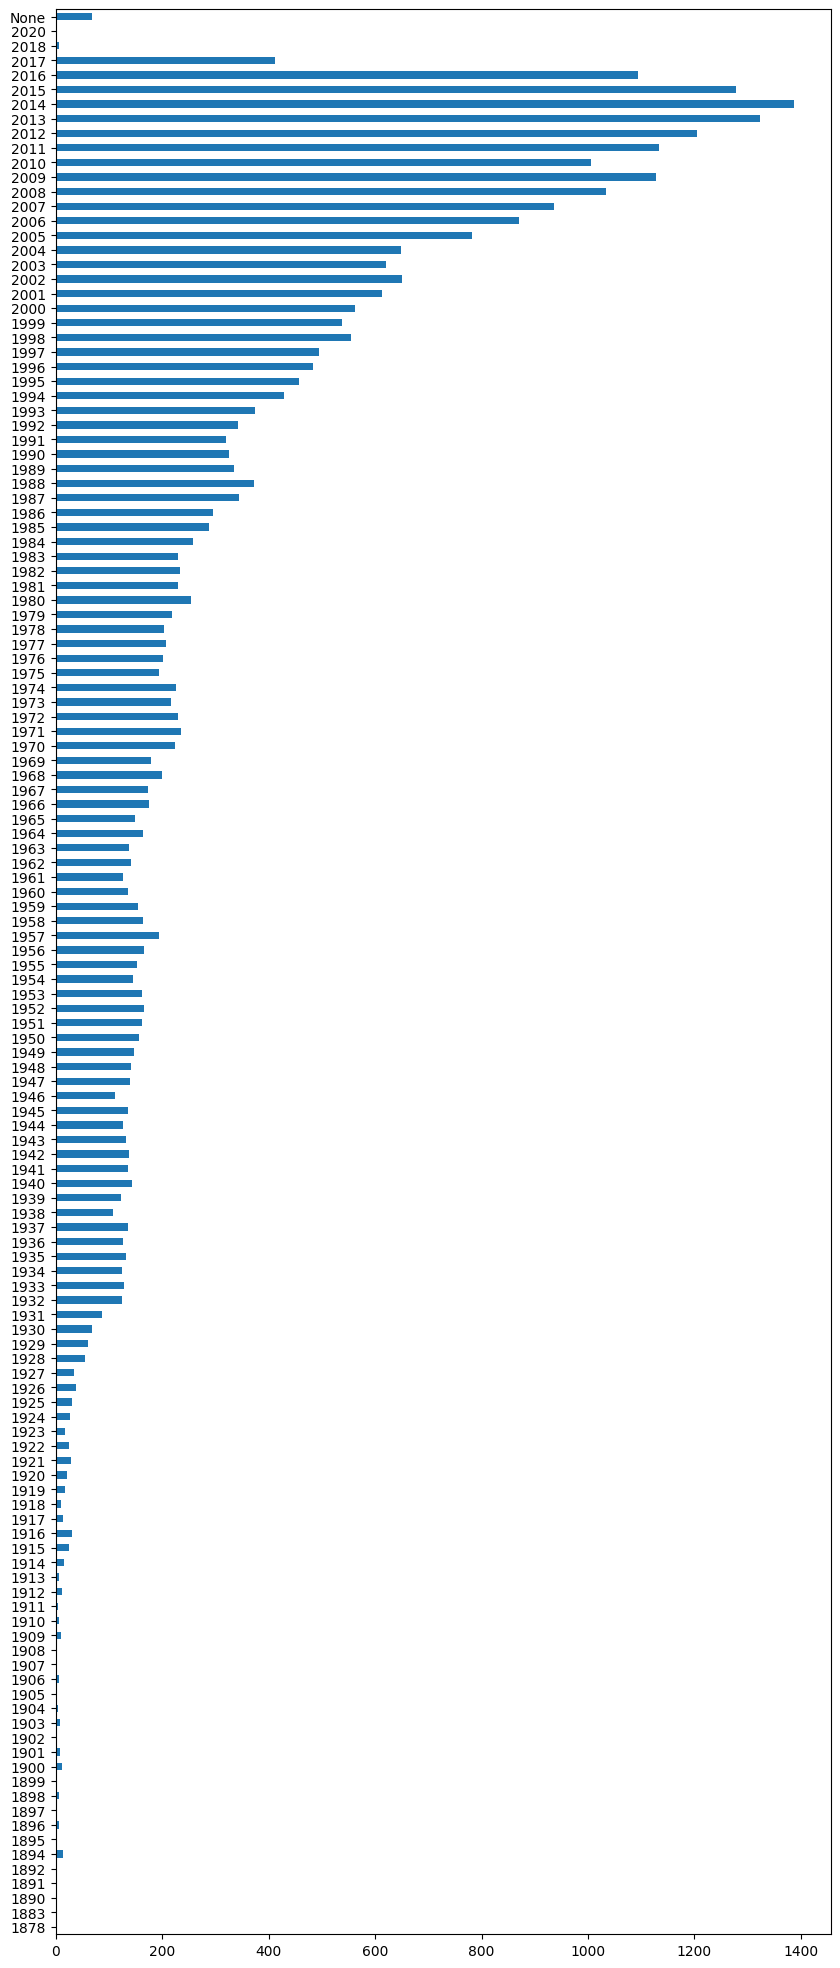

In [12]:
#plotting a bar graph to see how many movies were released each year
movies_df['year'].value_counts(dropna = False).sort_index().plot(kind = 'barh', figsize = (10, 25))
plt.show()

**Movies from 2017 onwards are missing in the Dataset**

In [13]:
cols = ['id', 'title', 'genres', 'cast', 'crew']
movies_df = movies_df[cols]
movies_df.reset_index(inplace = True, drop = True)
movies_df

,id,title,genres,cast,crew
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."
...,...,...,...,...,...
32321,14885,Caged Heat 3000,"[{'id': 878, 'name': 'Science Fiction'}]","[{'cast_id': 1, 'character': 'Roo (voice)', 'c...","[{'credit_id': '52fe46249251416c7506e969', 'de..."
32322,49280,Robin Hood,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...","[{'cast_id': 3, 'character': 'All the members ...","[{'credit_id': '52fe478dc3a36847f813bd6b', 'de..."
32323,404604,Betrayal,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...","[{'cast_id': 1, 'character': 'Devki Sabarwal',...","[{'credit_id': '58ee55bbc3a3683df500bd0f', 'de..."
32324,420346,Satan Triumphant,[],"[{'cast_id': 0, 'character': 'Lauren', 'credit...","[{'credit_id': '587626f4c3a3682b33008299', 'de..."


In [14]:
movies_df.isnull().sum()

id        0
title     2
genres    0
cast      0
crew      0
dtype: int64

In [15]:
movies_df.loc[0]['genres']

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [16]:
movies_df.loc[0]['cast']

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [17]:
movies_df.loc[1]['crew']

"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', 'gender': 2, 'id': 511, 'job': 'Executive Producer', 'name': 'Larry J. Franco', 'profile_path': None}, {'credit_id': '52fe44bfc3a36847f80a7c89', 'department': 'Writing', 'gender': 2, 'id': 876, 'job': 'Screenplay', 'name': 'Jonathan Hensleigh', 'profile_path': '/l1c4UFD3g0HVWj5f0CxXAvMAGiT.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7cdd', 'department': 'Sound', 'gender': 2, 'id': 1729, 'job': 'Original Music Composer', 'name': 'James Horner', 'profile_path': '/oLOtXxXsYk8X4qq0ud4xVypXudi.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7c7d', 'department': 'Directing', 'gender': 2, 'id': 4945, 'job': 'Director', 'name': 'Joe Johnston', 'profile_path': '/fok4jaO62v5IP6hkpaaAcXuw2H.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7cd7', 'department': 'Editing', 'gender': 2, 'id': 4951, 'job': 'Editor', 'name': 'Robert Dalva', 'profile_path': None}, {'credit_id': '573523bec3a368025100062c', 'department': 'Production', 'gender': 0, '

**All the above 3 columns are wrapped as string**

In [18]:
movies_df['genres'] = movies_df['genres'].swifter.apply(lambda x : ast.literal_eval(x))
movies_df['cast'] = movies_df['cast'].swifter.apply(lambda x : ast.literal_eval(x))
movies_df['crew'] = movies_df['crew'].swifter.apply(lambda x : ast.literal_eval(x))

Pandas Apply:   0%|          | 0/32326 [00:00<?, ?it/s]

/tmp/ipykernel_115/1473425688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['genres'] = movies_df['genres'].swifter.apply(lambda x : ast.literal_eval(x))


Pandas Apply:   0%|          | 0/32326 [00:00<?, ?it/s]

/tmp/ipykernel_115/1473425688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['cast'] = movies_df['cast'].swifter.apply(lambda x : ast.literal_eval(x))


Pandas Apply:   0%|          | 0/32326 [00:00<?, ?it/s]

/tmp/ipykernel_115/1473425688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['crew'] = movies_df['crew'].swifter.apply(lambda x : ast.literal_eval(x))


In [19]:
movies_df['genres']

0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                           [{'id': 35, 'name': 'Comedy'}]
                               ...                        
32321             [{'id': 878, 'name': 'Science Fiction'}]
32322    [{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...
32323    [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...
32324                                                   []
32325                                                   []
Name: genres, Length: 32326, dtype: object

In [22]:
def get_genres(genres):
    genres_string = ""
    for genre in genres:
        if genre['name'] == 'Science Fiction':
            genres_string += ('SciFi' + ' ')
        else:    
            genres_string += (genre['name'] + " ")
    return genres_string[:-1]
    
def get_top3(cast):
    actors_string = ""
    for i in range(min(3, len(cast))):
        name = cast[i]['name']
        name = name.replace(' ', "")
        actors_string += (name + " ")
    return actors_string[:-1]
        
def director(crew):
    for member in crew:
        if(member['job'] == 'Director'):
            name = member['name']
            name = name.replace(' ', '')
            return name

In [23]:
movies_df['fgenres'] = movies_df['genres'].swifter.apply(get_genres)
movies_df['top3cast'] = movies_df['cast'].swifter.apply(get_top3)
movies_df['director'] = movies_df['crew'].swifter.apply(director)
movies_df

Pandas Apply:   0%|          | 0/32326 [00:00<?, ?it/s]

/tmp/ipykernel_115/426310394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['fgenres'] = movies_df['genres'].swifter.apply(get_genres)


Pandas Apply:   0%|          | 0/32326 [00:00<?, ?it/s]

/tmp/ipykernel_115/426310394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['top3cast'] = movies_df['cast'].swifter.apply(get_top3)


Pandas Apply:   0%|          | 0/32326 [00:00<?, ?it/s]

/tmp/ipykernel_115/426310394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['director'] = movies_df['crew'].swifter.apply(director)


,id,title,genres,cast,crew,fgenres,top3cast,director
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",Animation Comedy Family,TomHanks TimAllen DonRickles,JohnLasseter
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",Adventure Fantasy Family,RobinWilliams JonathanHyde KirstenDunst,JoeJohnston
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",Romance Comedy,WalterMatthau JackLemmon Ann-Margret,HowardDeutch
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",Comedy Drama Romance,WhitneyHouston AngelaBassett LorettaDevine,ForestWhitaker
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",Comedy,SteveMartin DianeKeaton MartinShort,CharlesShyer
...,...,...,...,...,...,...,...,...
32321,14885,Caged Heat 3000,"[{'id': 878, 'name': 'Science Fiction'}]","[{'cast_id': 1, 'character': 'Roo (voice)', 'c...","[{'credit_id': '52fe46249251416c7506e969', 'de...",SciFi,JimmyBennett PeterCullen JimCummings,SaulBlinkoff
32322,49280,Robin Hood,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...","[{'cast_id': 3, 'character': 'All the members ...","[{'credit_id': '52fe478dc3a36847f813bd6b', 'de...",Drama Action Romance,GeorgesMéliès,GeorgesMéliès
32323,404604,Betrayal,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...","[{'cast_id': 1, 'character': 'Devki Sabarwal',...","[{'credit_id': '58ee55bbc3a3683df500bd0f', 'de...",Action Drama Thriller,SrideviKapoor SajalAli AkshayeKhanna,RaviUdyawar
32324,420346,Satan Triumphant,[],"[{'cast_id': 0, 'character': 'Lauren', 'credit...","[{'credit_id': '587626f4c3a3682b33008299', 'de...",,MarkieAdams RobertoAguire TinaArning,ShanraJ.Kehl


In [24]:
movies_df.loc[70]['top3cast']

'DemiMoore AlecBaldwin JosephGordon-Levitt'

In [31]:
movies_df['final'] = movies_df['fgenres'] + " " + movies_df['top3cast'] + " " + movies_df['director'].map(str)
movies_df

/tmp/ipykernel_115/791767364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['final'] = movies_df['fgenres'] + " " + movies_df['top3cast'] + " " + movies_df['director'].map(str)


,id,title,genres,cast,crew,fgenres,top3cast,director,final
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",Animation Comedy Family,TomHanks TimAllen DonRickles,JohnLasseter,Animation Comedy Family TomHanks TimAllen DonR...
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",Adventure Fantasy Family,RobinWilliams JonathanHyde KirstenDunst,JoeJohnston,Adventure Fantasy Family RobinWilliams Jonatha...
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",Romance Comedy,WalterMatthau JackLemmon Ann-Margret,HowardDeutch,Romance Comedy WalterMatthau JackLemmon Ann-Ma...
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",Comedy Drama Romance,WhitneyHouston AngelaBassett LorettaDevine,ForestWhitaker,Comedy Drama Romance WhitneyHouston AngelaBass...
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",Comedy,SteveMartin DianeKeaton MartinShort,CharlesShyer,Comedy SteveMartin DianeKeaton MartinShort Cha...
...,...,...,...,...,...,...,...,...,...
32321,14885,Caged Heat 3000,"[{'id': 878, 'name': 'Science Fiction'}]","[{'cast_id': 1, 'character': 'Roo (voice)', 'c...","[{'credit_id': '52fe46249251416c7506e969', 'de...",SciFi,JimmyBennett PeterCullen JimCummings,SaulBlinkoff,SciFi JimmyBennett PeterCullen JimCummings Sau...
32322,49280,Robin Hood,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...","[{'cast_id': 3, 'character': 'All the members ...","[{'credit_id': '52fe478dc3a36847f813bd6b', 'de...",Drama Action Romance,GeorgesMéliès,GeorgesMéliès,Drama Action Romance GeorgesMéliès GeorgesMéliès
32323,404604,Betrayal,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...","[{'cast_id': 1, 'character': 'Devki Sabarwal',...","[{'credit_id': '58ee55bbc3a3683df500bd0f', 'de...",Action Drama Thriller,SrideviKapoor SajalAli AkshayeKhanna,RaviUdyawar,Action Drama Thriller SrideviKapoor SajalAli A...
32324,420346,Satan Triumphant,[],"[{'cast_id': 0, 'character': 'Lauren', 'credit...","[{'credit_id': '587626f4c3a3682b33008299', 'de...",,MarkieAdams RobertoAguire TinaArning,ShanraJ.Kehl,MarkieAdams RobertoAguire TinaArning ShanraJ....


In [35]:
movies_df.dropna(subset = ['title'], inplace = True)
movies_df.isnull().sum()

/tmp/ipykernel_115/609258146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df.dropna(subset = ['title'], inplace = True)


id            0
title         0
genres        0
cast          0
crew          0
fgenres       0
top3cast      0
director    623
final         0
dtype: int64

In [ ]:
movies_df['final'].loc[70]

In [36]:
find = movies_df[movies_df['title'] == 'LEGO DC Super Hero Girls: Brain Drain']
find

,id,title,genres,cast,crew,fgenres,top3cast,director,final
32274,214753,LEGO DC Super Hero Girls: Brain Drain,"[{'id': 16, 'name': 'Animation'}]","[{'cast_id': 1, 'character': 'Oliver Threthewe...",[],Animation,JonPertwee PeterDavison SylvesterMcCoy,None,Animation JonPertwee PeterDavison SylvesterMcC...


In [28]:
find['final'] = find['fgenres'] + find['top3cast'] + find['director'].map(str)
find

/tmp/ipykernel_115/4239636222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  find['final'] = find['fgenres'] + find['top3cast'] + find['director'].map(str)


,id,title,genres,cast,crew,fgenres,top3cast,director,final
32274,214753,LEGO DC Super Hero Girls: Brain Drain,"[{'id': 16, 'name': 'Animation'}]","[{'cast_id': 1, 'character': 'Oliver Threthewe...",[],Animation,JonPertwee PeterDavison SylvesterMcCoy,None,AnimationJonPertwee PeterDavison SylvesterMcCo...


# Extracting Movies from 2018

In [49]:
curr_year = 2023

dfs = pd.DataFrame()

for year in range(2018, curr_year + 1):
    url = 'https://en.wikipedia.org/wiki/List_of_American_films_of_{}'.format(year)
    listofdf = pd.read_html(url, header = 0)
    for i in range(2, 6):
#         print(listofdf[i])
        dfs = dfs.append(listofdf[i], ignore_index = True)

        
dfs


,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.,Rank,Distributor,Domestic gross
0,J A N U A R Y,5.0,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...,[2],NaN,NaN,NaN,NaN
1,J A N U A R Y,5.0,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcl...,[3],NaN,NaN,NaN,NaN
2,J A N U A R Y,5.0,Stratton,Momentum Pictures / GFM Films,"Simon West (director); Duncan Falconer, Warren...",[4],NaN,NaN,NaN,NaN
3,J A N U A R Y,10.0,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, St...",[5],NaN,NaN,NaN,NaN
4,J A N U A R Y,12.0,The Commuter,Lionsgate / StudioCanal / The Picture Company,Jaume Collet-Serra (director); Byron Willinger...,[6],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1575,S E P T E M B E R,22.0,The Expendables 4,Lionsgate / Millennium Media,"Scott Waugh (director); Spenser Cohen, Max Ada...",NaN,[109],NaN,NaN,NaN
1576,S E P T E M B E R,22.0,The Book of Clarence,Columbia Pictures / Legendary Entertainment,Jeymes Samuel (director/screenplay); LaKeith S...,NaN,[155],NaN,NaN,NaN
1577,S E P T E M B E R,22.0,Drive-Away Dolls,Focus Features / Working Title Films,Ethan Coen (director/screenplay); Tricia Cooke...,NaN,[156],NaN,NaN,NaN
1578,S E P T E M B E R,29.0,PAW Patrol: The Mighty Movie,Paramount Pictures / Nickelodeon Movies / Spin...,"Cal Brunker (director); Kristen Bell, Christia...",NaN,[157],NaN,NaN,NaN


In [50]:
cols = ['Title', 'Cast and crew']
df = dfs[cols]
df

,Title,Cast and crew
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcl...
2,Stratton,"Simon West (director); Duncan Falconer, Warren..."
3,Sweet Country,"Warwick Thornton (director); David Tranter, St..."
4,The Commuter,Jaume Collet-Serra (director); Byron Willinger...
...,...,...
1575,The Expendables 4,"Scott Waugh (director); Spenser Cohen, Max Ada..."
1576,The Book of Clarence,Jeymes Samuel (director/screenplay); LaKeith S...
1577,Drive-Away Dolls,Ethan Coen (director/screenplay); Tricia Cooke...
1578,PAW Patrol: The Mighty Movie,"Cal Brunker (director); Kristen Bell, Christia..."


**We have to find genres for this data**

In [51]:
df.isnull().sum()

Title             1
Cast and crew    21
dtype: int64

In [52]:
df.dropna(how = 'any', inplace = True)

/tmp/ipykernel_115/1655405402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(how = 'any', inplace = True)


In [53]:
tmdb = TMDb()
tmdb_movie = Movie()
tmdb.api_key = '9e0b7f57d3b5f874fea0e35a82b5f54e'

In [ ]:
movie = tmdb_movie.search('Interstellar')
movie

In [55]:
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    if(len(result) == 0):
        return np.NaN
    movie_id = result[0].id
    response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
    data_json = response.json()
    if data_json['genres']:
        genre_str = " " 
        for i in range(0,len(data_json['genres'])):
            if(data_json['genres'][i]['name'] == 'Science Fiction'):
                genres.append('SciFi')
            else:
                genres.append(data_json['genres'][i]['name'])
        return genre_str.join(genres)
    else:
        np.NaN


In [57]:
df['genres'] = df['Title'].swifter.apply(get_genre)
df

KeyboardInterrupt: 

In [ ]:
df.to_csv('recentgenres.csv')

In [ ]:
response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(862, tmdb.api_key))
json = response.json()
for genre in json['genres']:
    print(genre['name'])

In [ ]:
df.dropna(inplace = True)
df.isnull().sum()

In [ ]:
df.loc[0]['Cast and crew']

In [ ]:
def get_director(x):
    ls = x.split(';')
    nameAndProffesion = ls[0].split(' ')
    return nameAndProffesion[0] + nameAndProffesion[1]


df['director'] = df['Cast and crew'].swifter.apply(get_director)
df['director']

In [ ]:
def get_actors(x):
    ls = x.split(';')
    actors = ls[-1].split(',')
    string = ""
    for i in range(min(3, len(actors))):
        actors[i] = actors[i].replace(' ', '')
        string += (actors[i] + " ")
    if len(string) > 0:
        return string[:-1]

df['actors'] = df['Cast and crew'].swifter.apply(get_actors)
df

In [ ]:
df['actors'].loc[69]

In [ ]:
df['final'] = df['genres'].map(str) + " " + df['actors'].map(str) + " " + df['director'].map(str)
df

In [ ]:
df['final'].loc[69]

In [ ]:
df.rename(columns = {'Title' : 'title'}, inplace = True)
df

In [ ]:
final_df = pd.concat([movies_df, df], axis = 0, ignore_index = True)
final_df

In [ ]:
cols = ['title', 'final']
final_df = final_df[cols]
final_df

In [ ]:
final_df.to_csv('processed.csv', index = False)